In [ ]:
import pandas as pd

In [ ]:
# df = pd.read_csv("bank-full.csv")
df = pd.read_csv('bank-full.csv', sep=';')

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
df.shape

(45211, 17)

In [12]:
df.describe()

,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [37]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [48]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [49]:
from sklearn.preprocessing import LabelEncoder

binary_columns = ['default', 'housing', 'loan', 'y']
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
print("Current columns in the DataFrame:")
print(df.columns)

columns_to_encode = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
missing_columns = [col for col in columns_to_encode if col not in df.columns]
if missing_columns:
    print(f"These columns are missing and cannot be encoded: {missing_columns}")

existing_columns = [col for col in columns_to_encode if col in df.columns]
df = pd.get_dummies(df, columns=existing_columns, drop_first=True)


Current columns in the DataFrame:
Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')
These columns are missing and cannot be encoded: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


In [58]:
print(df.dtypes)

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
job_unknown             bool
marital_married         bool
marital_single          bool
education_secondary     bool
education_tertiary      bool
education_unknown       bool
contact_telephone       bool
contact_unknown         bool
month_aug               bool
month_dec               bool
month_feb               bool
month_jan               bool
month_jul               bool
month_jun     

In [ ]:
X = df.drop(columns=['y'])  
y = df['y']  

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve

# 1. Train Logistic Regression model
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

# 2. Evaluate performance with default threshold
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Metrics (Default Threshold):")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# 3. Find the best threshold
probabilities = lr_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)
best_threshold = thresholds[(precision + recall).argmax()]
print("Best Threshold:", best_threshold)

# 4. Apply the new threshold and evaluate
y_pred_new = (probabilities >= best_threshold).astype(int)
print("Logistic Regression Metrics (Best Threshold):")
print(classification_report(y_test, y_pred_new))
print("Accuracy:", accuracy_score(y_test, y_pred_new))


Logistic Regression Metrics (Default Threshold):
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7952
           1       0.42      0.83      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.84      0.73      9043
weighted avg       0.91      0.84      0.86      9043

Accuracy: 0.8425301338051532
Best Threshold: 0.5098164509559051
Logistic Regression Metrics (Best Threshold):
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7952
           1       0.43      0.83      0.56      1091

    accuracy                           0.85      9043
   macro avg       0.70      0.84      0.74      9043
weighted avg       0.91      0.85      0.87      9043

Accuracy: 0.8461793652548932


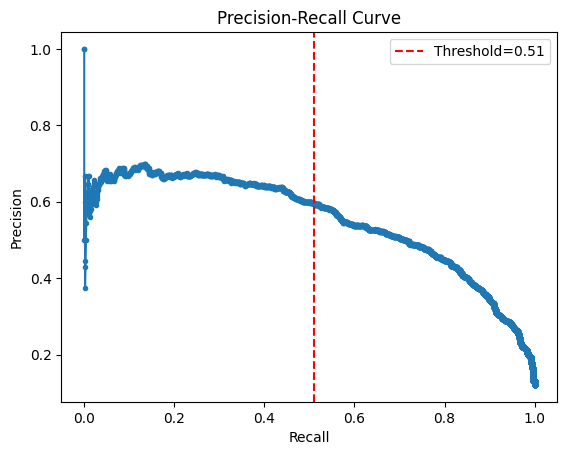

In [84]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Threshold={best_threshold:.2f}')
plt.legend()
plt.show()


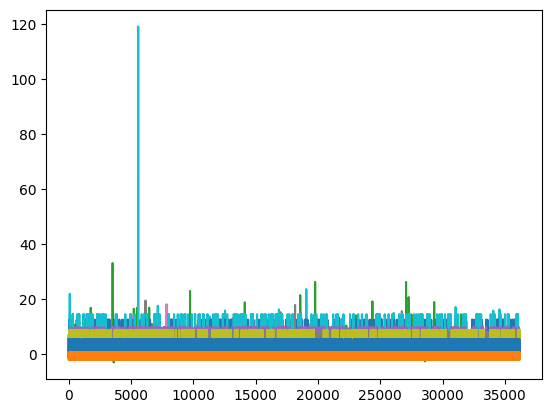

In [88]:
plt.plot(X_train)
plt.show()

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Metrics:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Metrics:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.50      0.49      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043

Accuracy: 0.8751520513104059


In [72]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Metrics:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.67      0.42      0.51      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.89      0.91      0.90      9043

Accuracy: 0.9052305650779608


In [76]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7952
           1       0.42      0.83      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.84      0.73      9043
weighted avg       0.91      0.84      0.86      9043

Accuracy: 0.8425301338051532


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


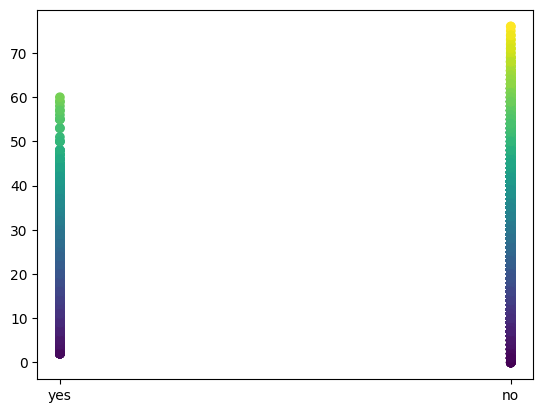

In [47]:
plt.scatter(df['housing'], df['age'], c=df['age'])
